<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Early-Warning-Signals" data-toc-modified-id="Early-Warning-Signals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Early Warning Signals</a></span><ul class="toc-item"><li><span><a href="#Import-some-libraries" data-toc-modified-id="Import-some-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import some libraries</a></span></li><li><span><a href="#Early-Warning-Signals" data-toc-modified-id="Early-Warning-Signals-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Early Warning Signals</a></span><ul class="toc-item"><li><span><a href="#Some-helper-functions" data-toc-modified-id="Some-helper-functions-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Some helper functions</a></span></li><li><span><a href="#Metric-based" data-toc-modified-id="Metric-based-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Metric-based</a></span><ul class="toc-item"><li><span><a href="#Standard-Deviation" data-toc-modified-id="Standard-Deviation-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Standard Deviation</a></span></li><li><span><a href="#Skewness" data-toc-modified-id="Skewness-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>Skewness</a></span></li><li><span><a href="#Kurtosis" data-toc-modified-id="Kurtosis-1.2.2.3"><span class="toc-item-num">1.2.2.3&nbsp;&nbsp;</span>Kurtosis</a></span></li><li><span><a href="#Autocorrelation-at-lag-1" data-toc-modified-id="Autocorrelation-at-lag-1-1.2.2.4"><span class="toc-item-num">1.2.2.4&nbsp;&nbsp;</span>Autocorrelation at lag 1</a></span></li><li><span><a href="#Conditional-heteroskedasticity" data-toc-modified-id="Conditional-heteroskedasticity-1.2.2.5"><span class="toc-item-num">1.2.2.5&nbsp;&nbsp;</span>Conditional heteroskedasticity</a></span></li></ul></li><li><span><a href="#Model-based" data-toc-modified-id="Model-based-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Model-based</a></span><ul class="toc-item"><li><span><a href="#Time-varying-AR" data-toc-modified-id="Time-varying-AR-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>Time-varying AR</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Early Warning Signals

Detecting critical transitions in timeseries

Author: Alva Presbitero

## Import some libraries

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from patsy import dmatrices

from scipy.stats import skew, kurtosis
from itertools import product

In [2]:
noise = []
noise_type_list = ['sigmoid', 'gaussian', 'linear']
sigma_type_list = ['constant', 'increasing']

output = list(product(noise_type_list, sigma_type_list))

for index, (noise_type, sigma_type) in enumerate(output):
    print ('noise_type :', index, noise_type, sigma_type)
    pickle_dir = f'result/pickle/noise/{noise_type}/{sigma_type}/'
    pickle_file = noise_type + '_' + sigma_type + '.pickle'
    with open(pickle_dir + pickle_file, 'rb') as f:
        noise.append(pickle.load(f))
#         print (noise_list[index])

noise_type : 0 sigmoid constant
noise_type : 1 sigmoid increasing
noise_type : 2 gaussian constant
noise_type : 3 gaussian increasing
noise_type : 4 linear constant
noise_type : 5 linear increasing


In [3]:
# noise_1, noise_2, noise_3, noise_4 = noise_list[0], noise_list[1], noise_list[2], noise_list[3]
noise_names = ['Sigmoid (constant sigma)', 'Sigmoid (increasing sigma)', 
               'Gaussian (constant sigma)', 'Gaussian (increasing sigma)',
               'Linear (constant sigma)', 'Linear (increasing sigma)']

## Early Warning Signals

<img src='images/EWS' width="400" height="400">


### Some helper functions

In [4]:
# used to detrend
def difference(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

In [5]:
def roll_window(dataset, win_size, func):
    return dataset.rolling(int(win_size), center=True).apply(func)

In [6]:
def plot(data, immune, noise_name, immune_name, method_name, method, win_size, time = 'Time'):
    diff = pd.DataFrame(difference(data[immune]))

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5))
    fig.suptitle(noise_name + ' : ' + immune_name)

    axes[0,0].plot(data[immune])
    axes[0,0].set_title("Data")
    axes[0,0].set_xlabel("Timestep")

    axes[0,1].plot(diff)
    axes[0,1].set_title("Residuals")
    axes[0,1].set_xlabel("Timestep")

    axes[1,0].plot(method(data[immune], data[time], win_size))
    axes[1,0].set_title(method_name + " on Data")
    axes[1,0].set_xlabel("Timestep")

    axes[1,1].plot(method(diff, data[time], win_size))
    axes[1,1].set_title(method_name + " on Residuals")
    axes[1,1].set_xlabel("Timestep")

    fig.tight_layout()

### Metric-based
#### Standard Deviation

In [13]:
def do_ews_std(dataset, time, win_size):
    return dataset.rolling(int(win_size), center=True).std()

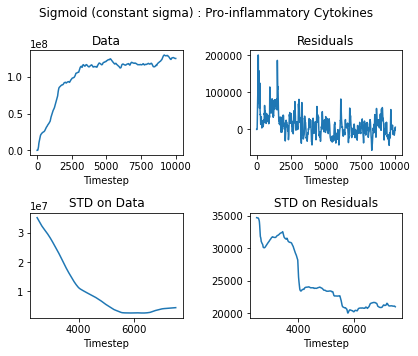

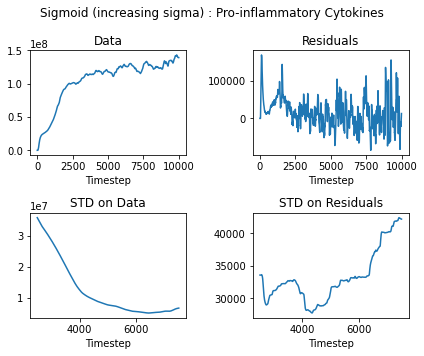

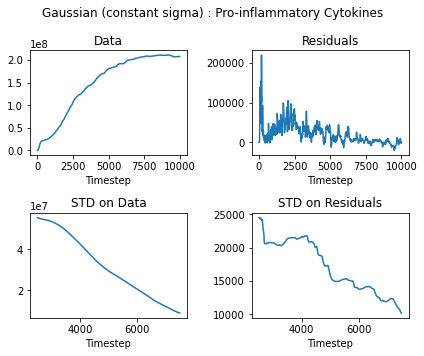

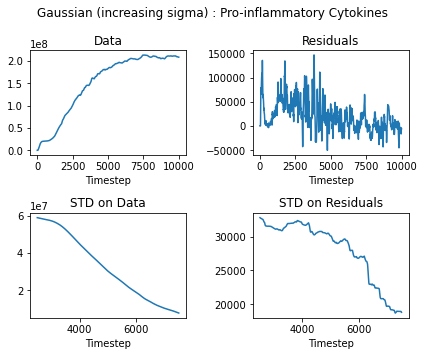

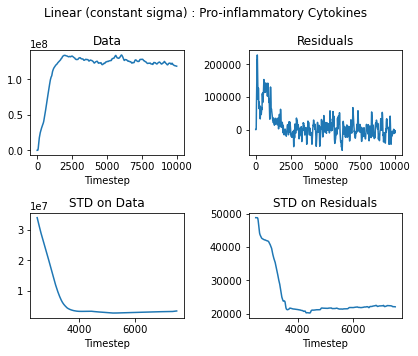

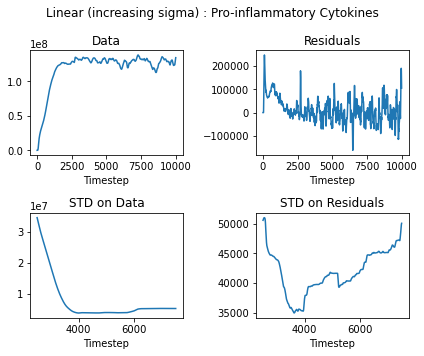

In [14]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'STD', 
         method = do_ews_std,
         win_size = len(noise[choice])/2)

#### Skewness


In [15]:
def do_ews_skew(dataset, time, win_size):
    return dataset.rolling(int(win_size)).apply(skew)

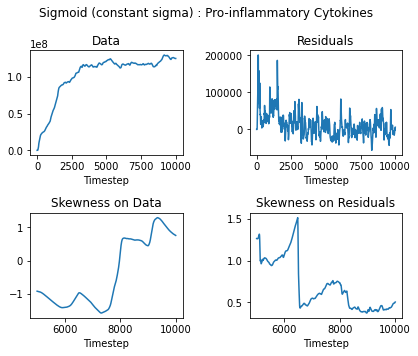

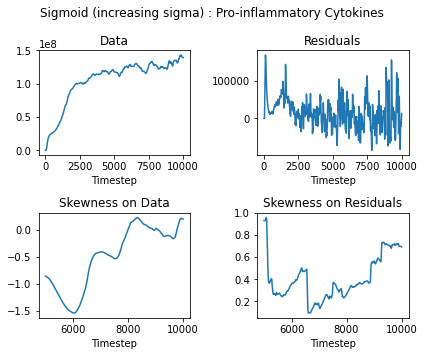

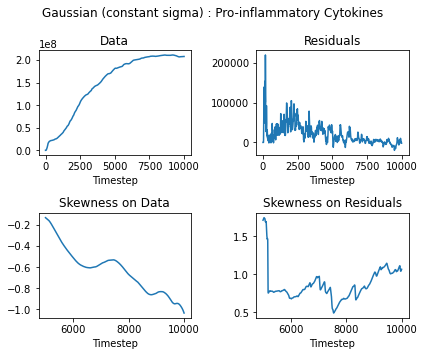

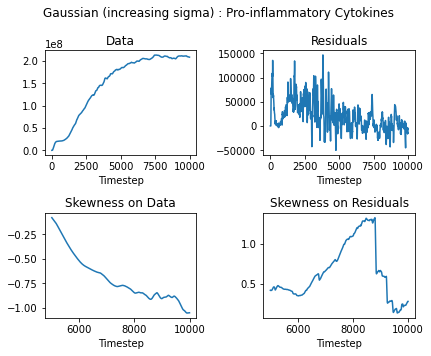

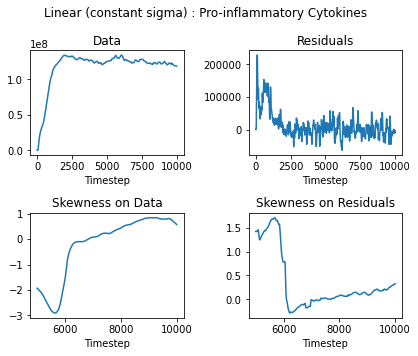

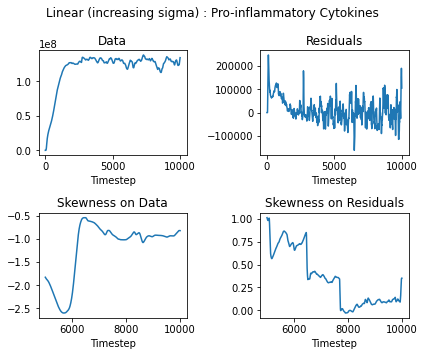

In [16]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'Skewness', 
         method = do_ews_skew,
         win_size = len(noise[choice])/2)

#### Kurtosis

In [17]:
def do_ews_kurt(dataset, time, win_size):
    return dataset.rolling(int(win_size)).apply(kurtosis)

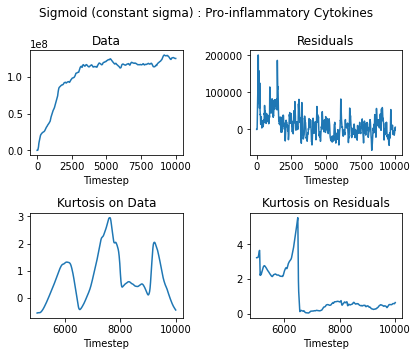

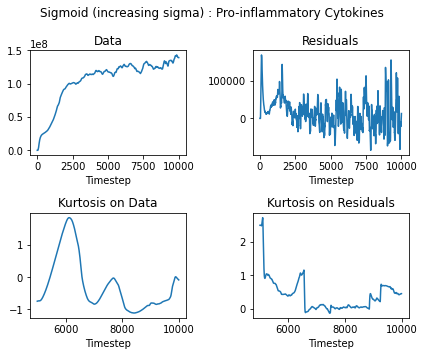

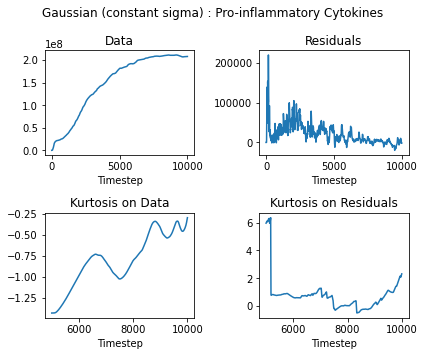

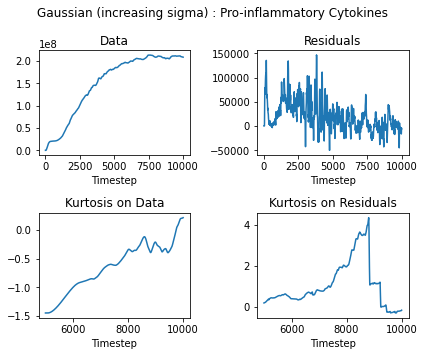

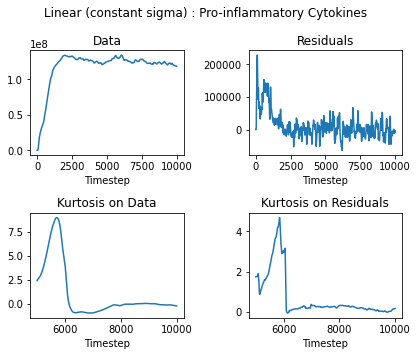

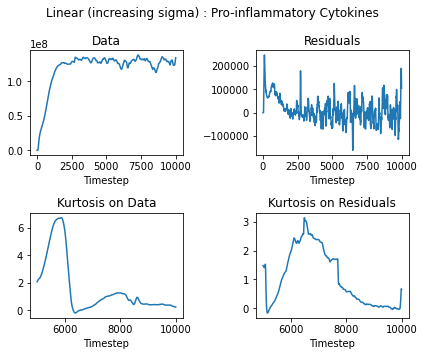

In [18]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'Kurtosis', 
         method = do_ews_kurt,
         win_size = len(noise[choice])/2)

#### Autocorrelation at lag 1

In [19]:
def get_auto(dataset, lag=1):
    return sm.tsa.acf(dataset)[lag]

In [20]:
def do_ews_auto(dataset, time, win_size, lag=1):
    return dataset.rolling(int(win_size)).apply(get_auto)

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


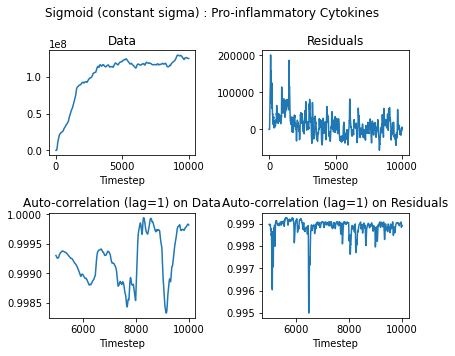

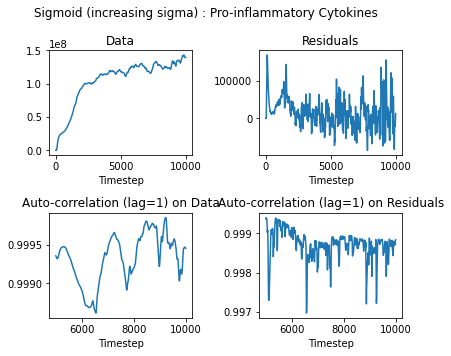

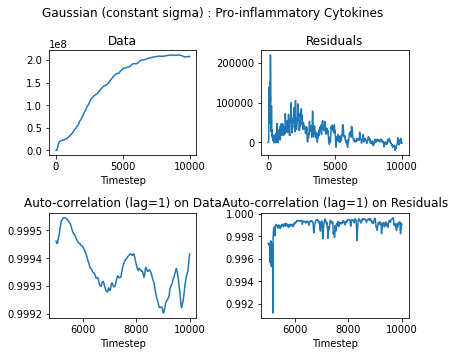

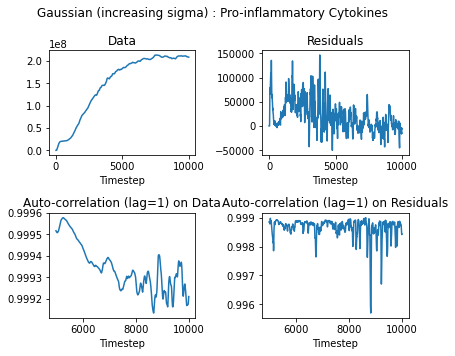

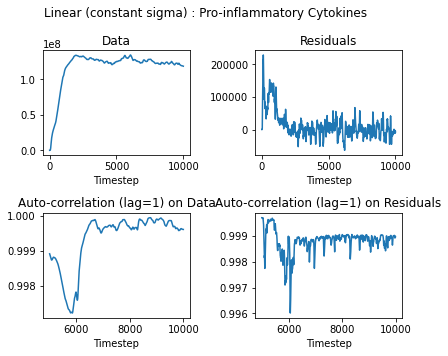

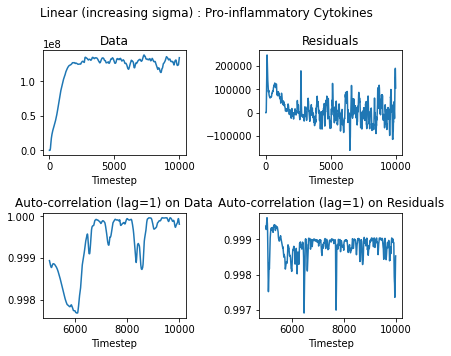

In [21]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'Auto-correlation (lag=1)', 
         method = do_ews_auto,
         win_size = len(noise[choice])/2)

#### Conditional heteroskedasticity
Conditional heteroskedasticity means that variance at one time step has a positive relationship with variance at one or more previous time steps. This implies that periods of high variability will tend to follow periods of high variability and periods of low variability will tend to follow periods of low variability

Useful reference: https://towardsdatascience.com/heteroscedasticity-is-nothing-to-be-afraid-of-730dd3f7ca1f

In [112]:
def get_ch(dataset, time):
    df = pd.DataFrame(dataset)
    df['Time'] = time.loc[dataset.index]
    df[f'LOG_'] = np.log(dataset)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df = df.dropna()
    expr = f'LOG_ ~ Time'
    y, X = dmatrices(expr, df, return_type='dataframe')
    olsr_results = smf.ols(expr, df).fit()
    keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
    results = het_white(olsr_results.resid, X)
#     lzip(keys, results)
    return results[1]

In [113]:
def do_ews_ch(dataset, time, win_size):
    return dataset.rolling(int(win_size)).apply(get_ch, args =(time,) )

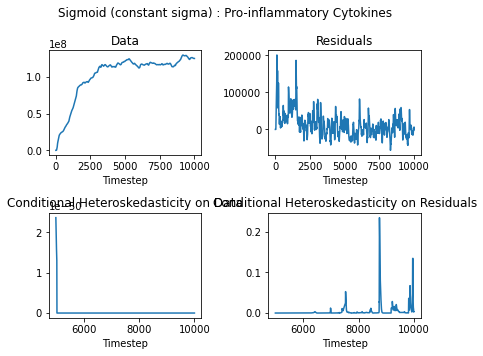

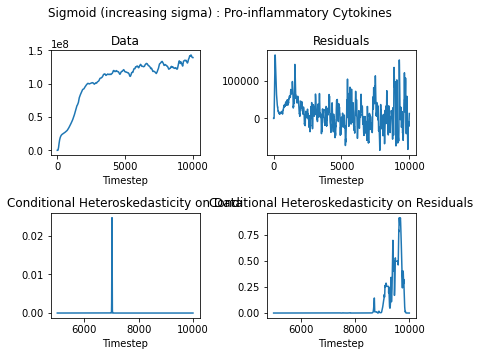

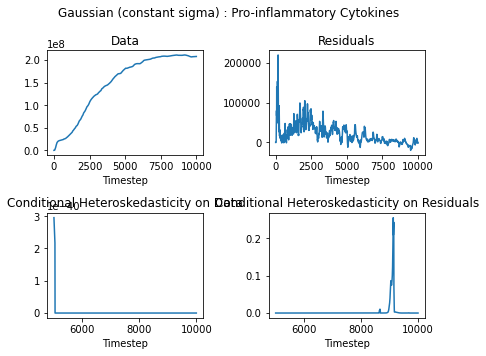

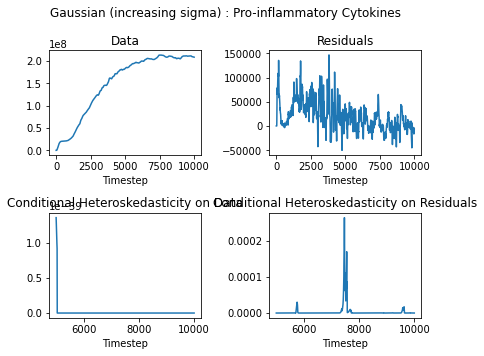

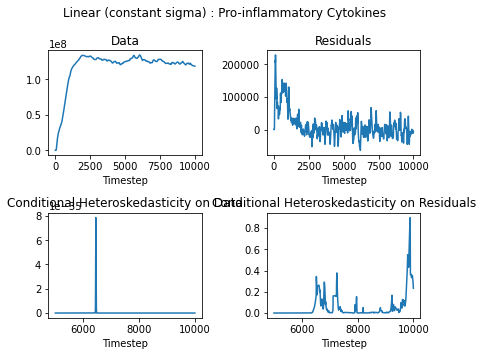

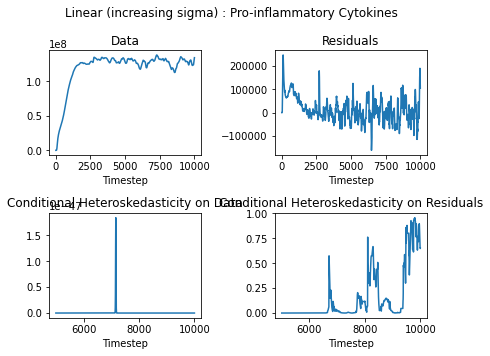

In [114]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'Cond. Heteroskedasticity', 
         method = do_ews_ch,
         win_size = len(noise[choice])/2)

### Model-based

#### Time-varying AR
Time-varying AR(p) [autoregressive] models provide a model-based approach for estimating time-dependent return rates in time series, which can act as an early warning of a critical transition.